# The goodness-of-fit test

In [1]:
from lib import phi, rand_TCL_ms, generate_TCL_ms, sturges

  * Si definisca una funzione $\varphi(x, a, b, c)$ 
       che traccia un andamento parabolico in funzione di $x$ 
       e se ne disegni  disegni l'andamento nell'intervallo $(0,10)$:
        \begin{equation} \nonumber
              \varphi(x,a,b,c) = a + bx + cx^2
        \end{equation}
        con:
        \begin{cases} 
              a &= ~3 \\
              b &= ~2 \\
              c &= ~1
        \end{cases}

Text(0, 0.5, 'y')

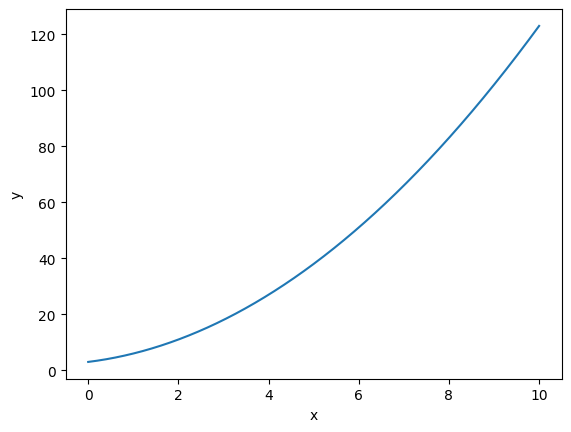

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

fig, ax = plt.subplots (nrows = 1, ncols = 1)

# preparing the set of points to be drawn 
x_func = np.linspace (0, 10, 10000)
theta = [3, 2, 1]
a = 3
b = 2
c = 1
y_func = phi (x_func, a, b, c)

# visualisation of the image
ax.plot (x_func, y_func, label='phi')
ax.set_xlabel ('x')
ax.set_ylabel ('y')
#  plt.savefig ('pdf.png')


  * Si generino N = 10 punti $x_i$ distribuiti in modo pseudo-casuale 
      secondo una distribuzione uniforme sull'intervallo orizziontale 
      e si associ a ciascuno di essi una coordinata 
        \begin{equation} \nonumber
              y_i = \varphi(x_i, a,b,c) + \varepsilon_i,
        \end{equation}
       dove $\varepsilon_i$ è un numero pseudo casuale 
       generato, con il metodo del teorema centrale del limite, 
       secondo una distribuzione Gaussiana di media 0 e deviazione standard $\sigma_y=10$.

In [3]:

x_coord = np.array ([uniform (0, 10) for i in range (10)])
x_coord.sort () # i punti vanno ordinati perché iminuit faccia il fit nel range che li contiene tutti
sigma_y = 10
y_coord = list( map (lambda k:sum(k), zip (phi (x_coord, a, b, c), generate_TCL_ms (0., sigma_y, 10))))

# fig, ax = plt.subplots()
ax.errorbar (x_coord, y_coord, xerr=0, yerr=10,  marker='o', linestyle = '')
plt.show()

plt.show ()


  * Si faccia un fit della funzione $\varphi(x, a, b, c)$ sul campione così generato 
      (che tecnica bisogna utilizzare?).

In [4]:
from iminuit import Minuit
from iminuit.cost import LeastSquares

# generate a least-squares cost function
least_squares = LeastSquares (x_coord, y_coord, sigma_y, phi)
my_minuit = Minuit (least_squares, a = 0, b = 1, c = 1)  # starting values for m and q
my_minuit.migrad ()  # finds minimum of least_squares function

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.875 (χ²/ndof = 1.0)      │              Nfcn = 53               │
│ EDM = 3e-14 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │    -10    │    40     │            │            │         │         │       │
│ 1 │ b    │     3     │    13     │            │            │         │         │       │
│ 2 │ c    │    1.2    │    1.0    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        a        b        c │
├───┼────────────────────────────┤
│ a │ 1.37e+03  -0.46e3     36.1 │
│ b │  -0.46e3      160    -12.9 │
│ c │     36.1    -12.9     1.06 │
└───┴────────────────────────────┘

 * si costruisca la distribuzione del $Q^2$ a partire dal fit effettuato, ripetendolo molte volte utilizzando toy experiment

In [ ]:
N_toys = 100000

Q2_list = []
for i in range (N_toys):
    x_coord = np.array ([uniform (0, 10) for i in range (10)])
    x_coord.sort ()
    y_coord = list( map (lambda k:sum(k), zip (phi (x_coord, a, b, c), generate_TCL_ms (0., sigma_y, 10))))
    least_squares = LeastSquares (x_coord, y_coord, sigma_y, phi)
    my_minuit = Minuit (least_squares, a = 0, b = 1, c = 1)  # starting values for m and q
    my_minuit.migrad ()  # finds minimum of least_squares function
    Q2_list.append (my_minuit.fval)

 * si svolga il punto precedente generando gli scarti $\varepsilon_i$ secondo una distribuzione uniforme che abbia la stessa deviazione standard della gaussiana utilizzata precedentemente e si disegni la distribuzione del $Q^2$ così ottenuto sovrapposta a quella precedente.

In [11]:
Q2_list_unif = []
for i in range (N_toys):
    x_coord = np.array ([uniform (0, 10) for i in range (10)])
    x_coord.sort ()
    y_coord = list( map (lambda k:sum(k), zip (phi (x_coord, a, b, c), [uniform (- 1.732 * sigma_y, 1.732 * sigma_y) for i in range (10)])))
    least_squares = LeastSquares (x_coord, y_coord, sigma_y, phi)
    my_minuit = Minuit (least_squares, a = 0, b = 1, c = 1)  # starting values for m and q
    my_minuit.migrad ()  # finds minimum of least_squares function
    Q2_list_unif.append (my_minuit.fval)

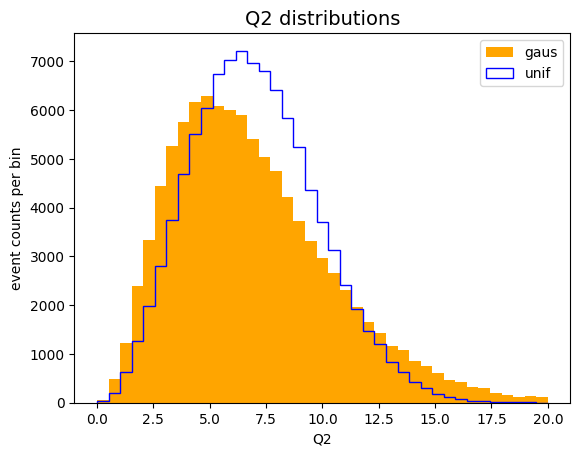

In [17]:
N_bins = sturges (len (Q2_list))
xMin = 0
xMax = 20
bin_edges = np.linspace (xMin, xMax, N_bins)
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (Q2_list,
         bins = bin_edges,
         color = 'orange',
         label = 'gaus',
        )
ax.hist (Q2_list_unif,
         bins = bin_edges,
         color = 'blue',
         label = 'unif',
         histtype='step',
        )
ax.set_title ('Q2 distributions', size=14)
ax.set_xlabel ('Q2')
ax.set_ylabel ('event counts per bin')
ax.legend ()
plt.show ()


 * in funzione della distribuzione ottenuta per il $Q^2$, si determini la soglia oltre la quale rigettare il risultato del fit, dato il suo valore di $Q^2$, per ottenere un p-value maggiore o uguale di 0.10

In [15]:
# ordina i valori di Q2
# scorri i valori fino a che la frazione è maggiore di 0.9... cioè prendi l'elemento che sta all'indice 90% del totale
from math import floor
N_threshold = floor (N_toys * 0.9)
Q2_list_unif.sort ()
print ('soglia al 90%:', Q2_list_unif[N_threshold])

soglia al 90%: 10.712882196443719


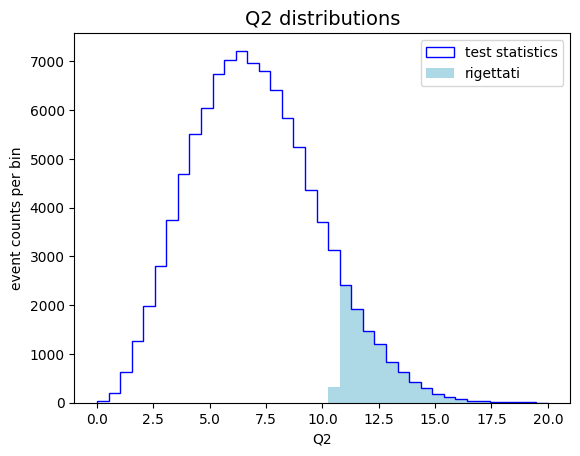

In [19]:
Q2_list_unif_rigettati = [val for val in Q2_list_unif if val > Q2_list_unif[N_threshold]]

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (Q2_list_unif,
         bins = bin_edges,
         color = 'blue',
         label = 'test statistics',
         histtype='step',
        )
ax.hist (Q2_list_unif_rigettati,
         bins = bin_edges,
         color = 'lightblue',
         label = 'rigettati',
        )
ax.set_title ('Q2 distributions', size=14)
ax.set_xlabel ('Q2')
ax.set_ylabel ('event counts per bin')
ax.legend ()
plt.show ()
